In [ ]:
#Tratamento de outliers:

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats

In [3]:
# Carregando a tabela da imagem
data = pd.read_csv('/content/apple_quality.csv', header=0)

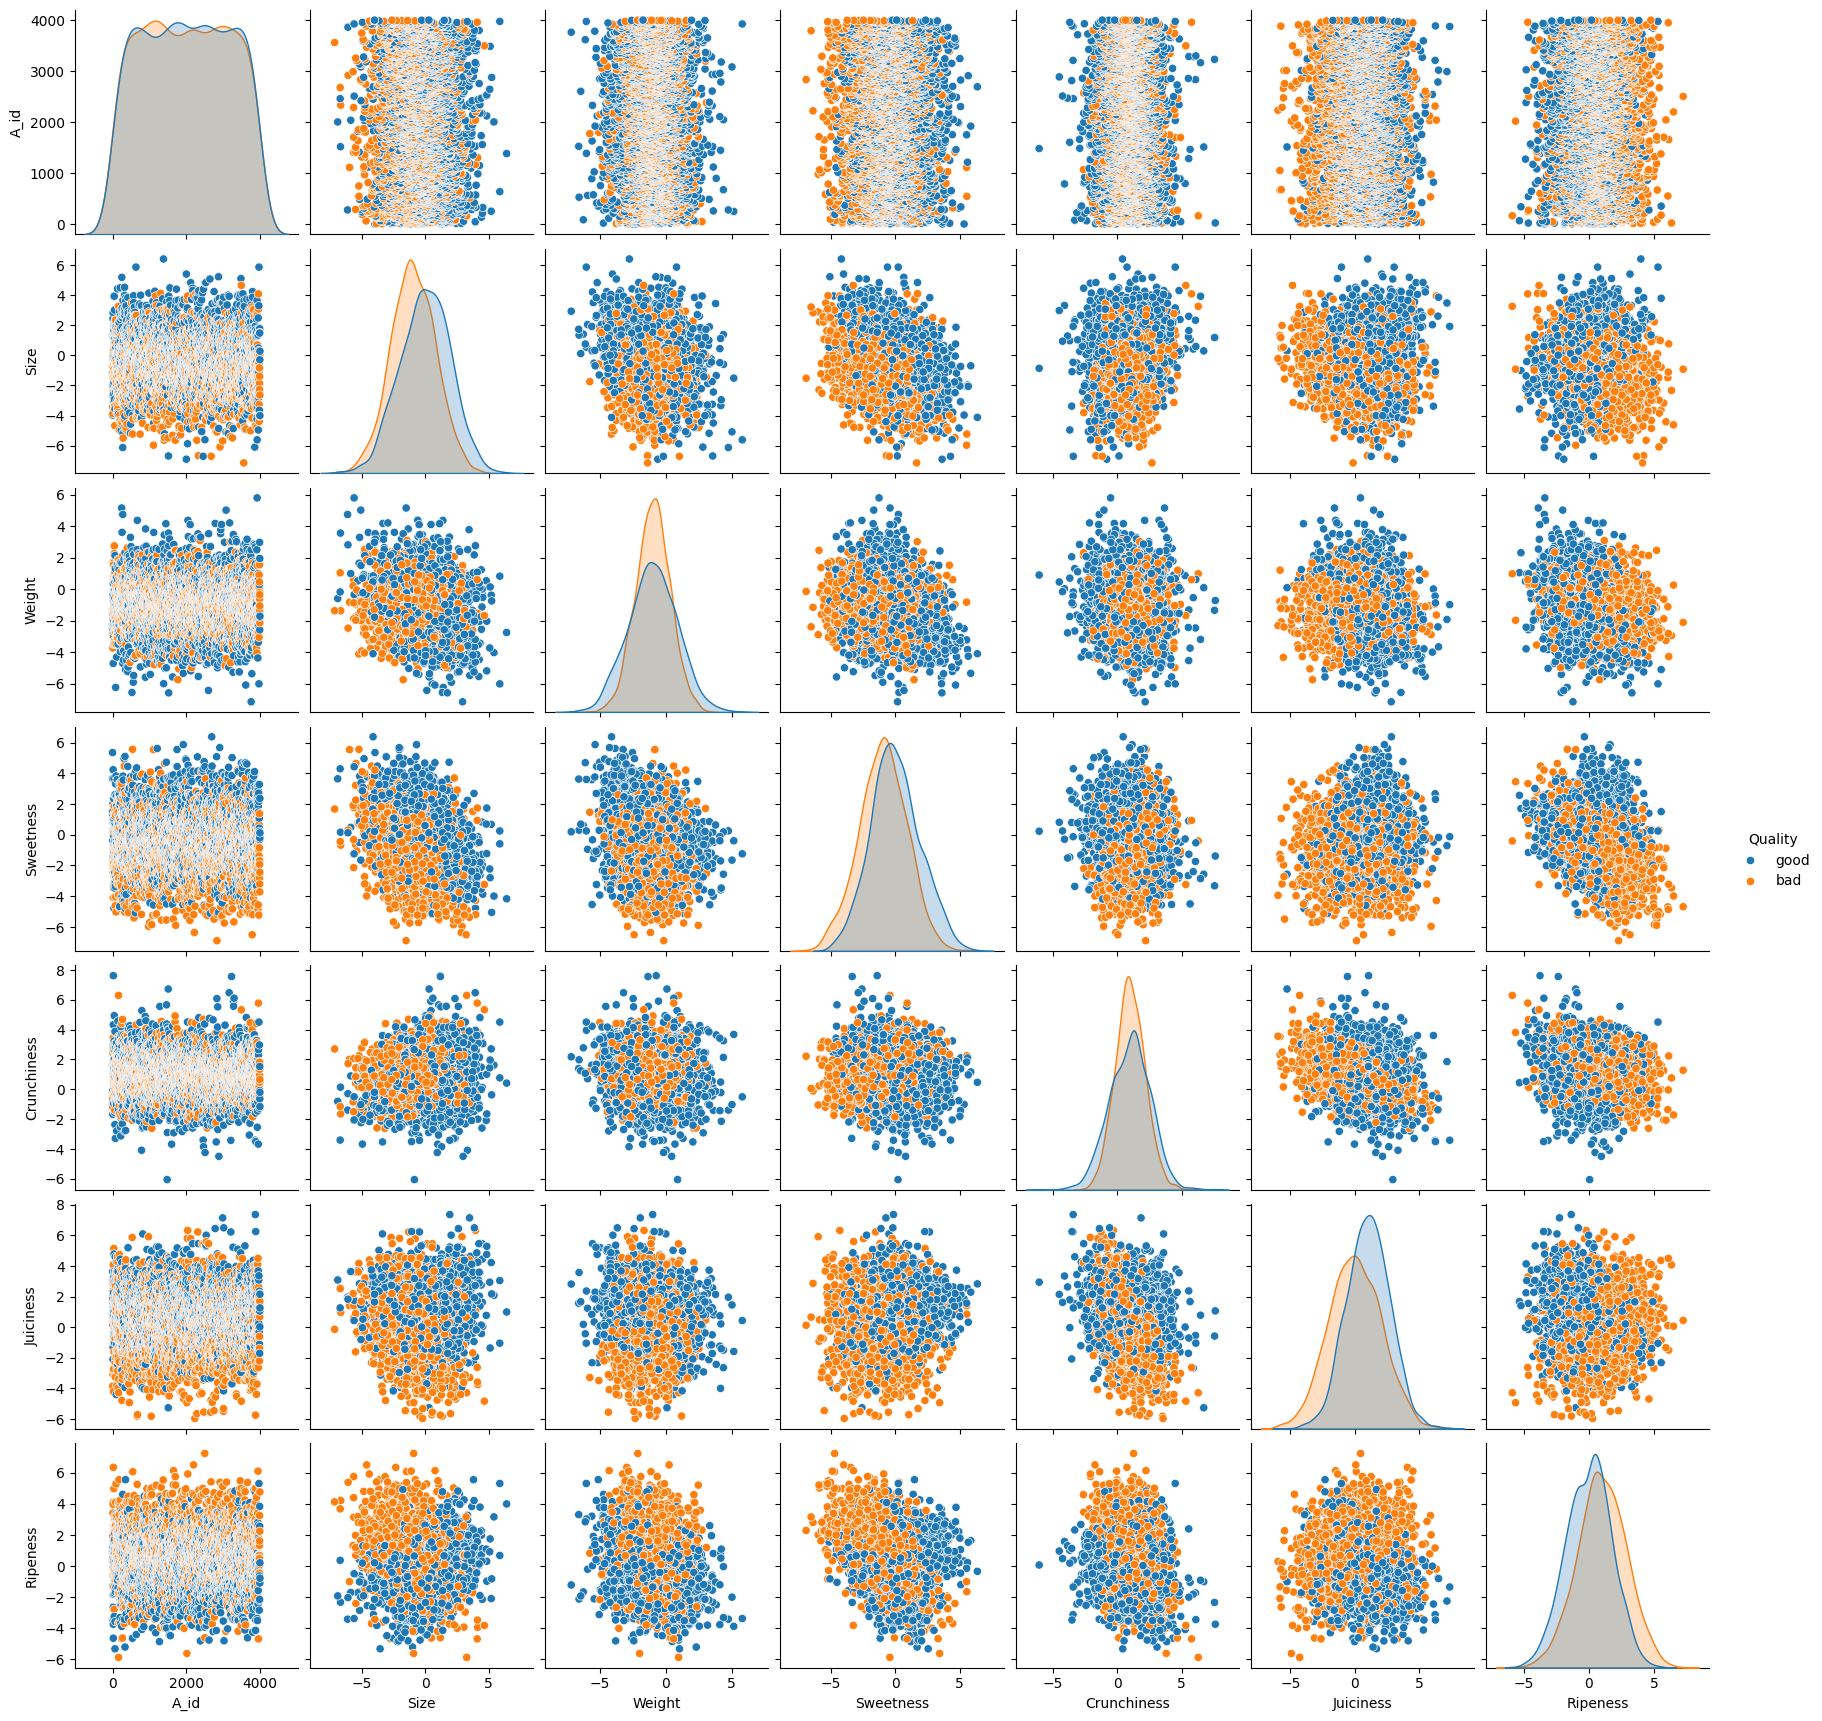

In [4]:
# Gráficos de dispersão
sns.pairplot(data, hue='Quality')
plt.show()

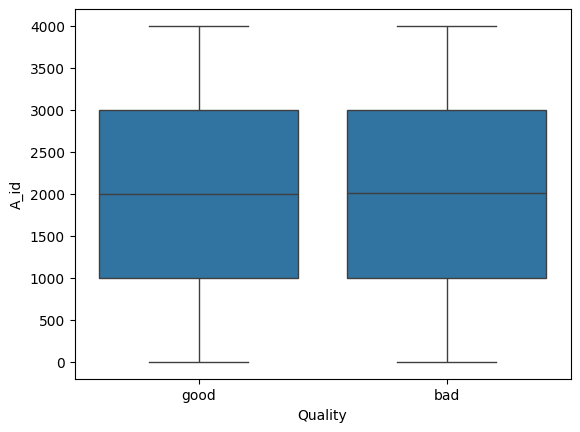

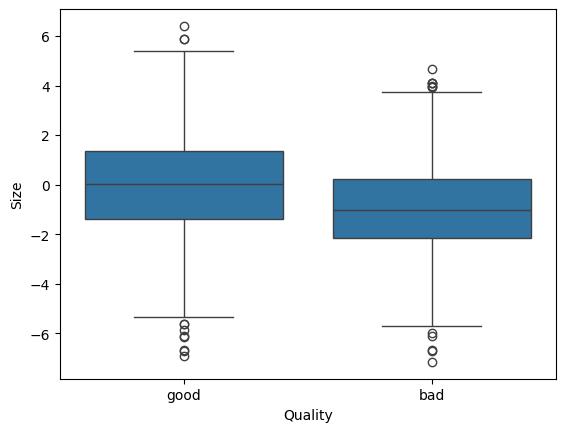

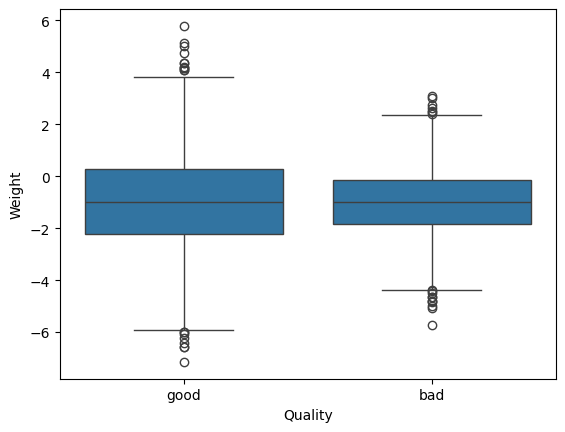

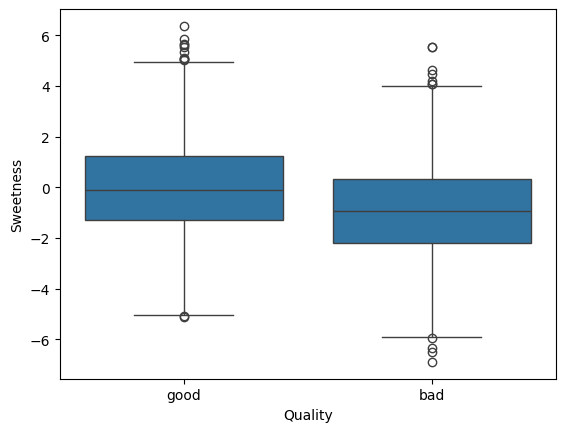

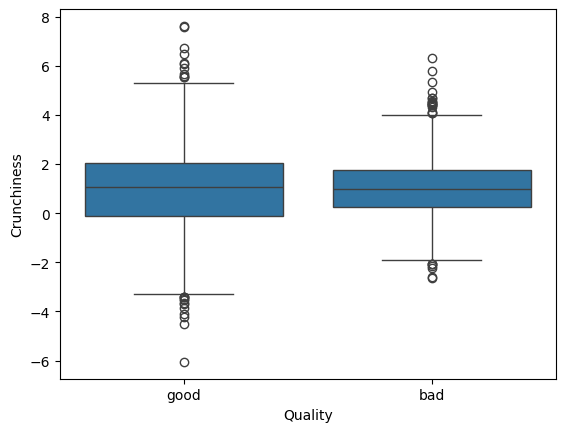

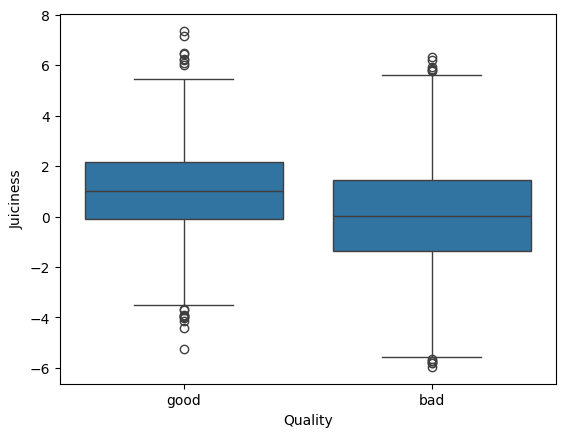

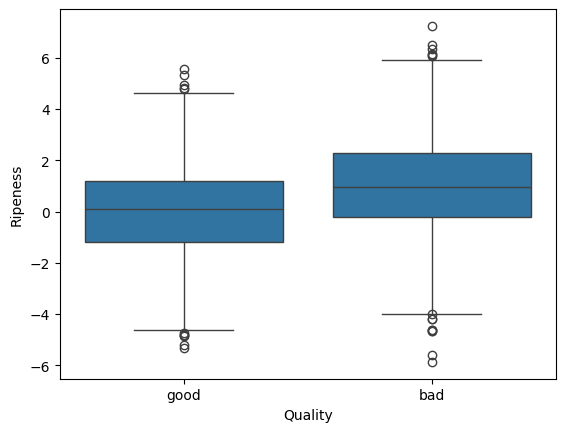

In [5]:
# Boxplots
for column in data.columns[:-2]:
    sns.boxplot(x='Quality', y=column, data=data)
    plt.show()

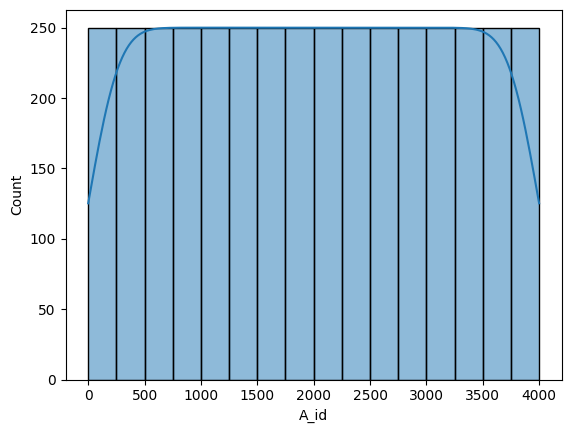

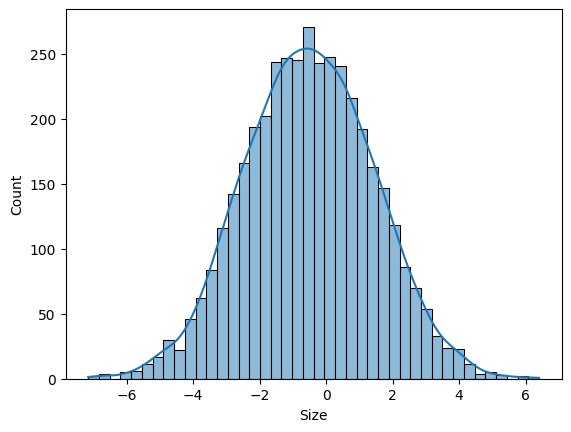

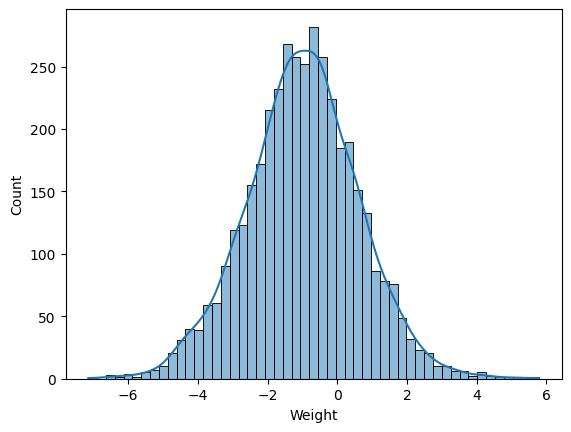

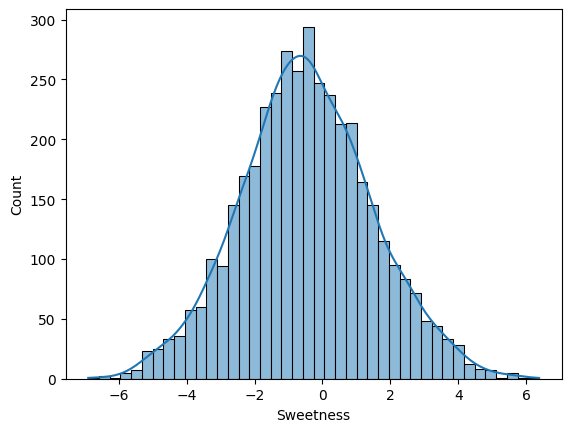

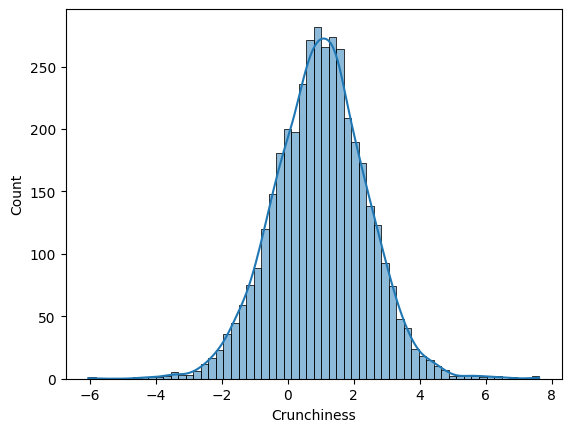

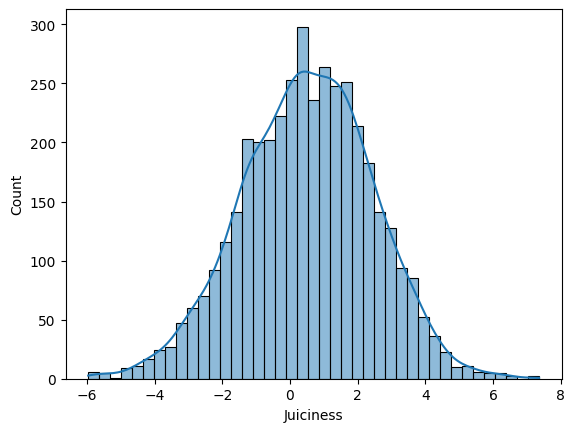

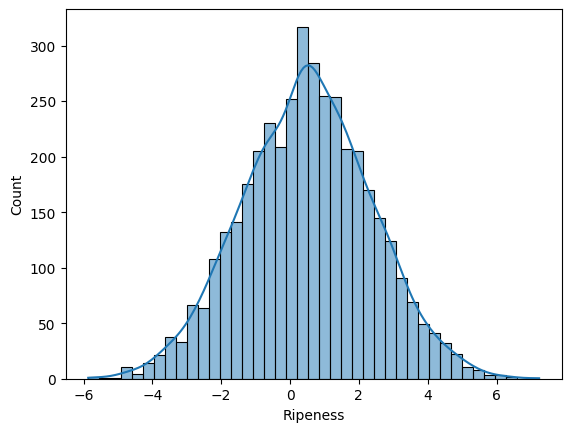

In [6]:
# Histogramas
for column in data.columns[:-2]:
    sns.histplot(data[column], kde=True)
    plt.show()

<ipython-input-7-ddb2b05d4331>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


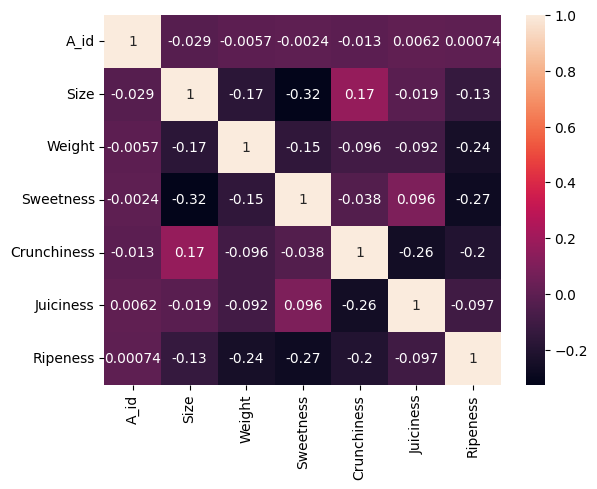

In [7]:
# Matriz de correlação entre variáveis
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [8]:
# Tratamento de outliers usando IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

<ipython-input-8-109f22b6e89a>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-8-109f22b6e89a>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)


In [9]:
# Identificando os outliers
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

<ipython-input-9-ca265a808577>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))


In [10]:
# Exibindo os outliers
print(data[outliers.any(axis=1)])

        A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
19      19.0 -2.108050  0.356467  -1.156193     4.326723   1.561543 -4.630174   
20      20.0 -2.334590 -2.943709  -3.452628     0.762392   4.076462  6.346445   
21      21.0  1.177593 -0.721654  -1.387116     7.619852   1.069288 -3.734805   
45      45.0  0.033471 -0.044161  -0.481202     4.937210  -0.609873 -3.231504   
...      ...       ...       ...        ...          ...        ...       ...   
3923  3923.0 -5.616711  5.790714  -1.243051    -0.505189   0.438719 -3.367809   
3947  3947.0 -1.116261 -2.815721  -4.858055    -0.039825   4.504978  6.102587   
3955  3955.0 -4.960451  0.699911   2.862232    -3.674746  -0.028949  0.194217   
3957  3957.0  4.086332  0.601599   0.934812     5.780529  -2.627074 -4.676170   
3973  3973.0  5.865861 -6.010559   0.246081     4.507715  -1.041609  5.309622   

           Acidity Quality 

In [11]:
# Preencher os valores nulos com a média das colunas
data = data.fillna(data.mean())

<ipython-input-11-3be408c1243e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [ ]:
# MÉTRICAS: ACURÁCIA, PRECISÃO, RECALL E MATRIZ DE CONFUSÃO.

In [12]:
# Criar um Pandas Data Frame a partir do arquivo de dados csv
dados = pd.read_csv('/content/apple_quality.csv')
dados

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [13]:
dados.shape
print(f'O conjunto de dados tem {dados.shape[0]} linhas e {dados.shape[1]} colunas.')

O conjunto de dados tem 4001 linhas e 9 colunas.


In [14]:
dados.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [15]:
dados.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [16]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [17]:
dados.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [18]:
a = dados.describe(include='object')
a

,Acidity,Quality
count,4001,4000
unique,4001,2
top,-0.491590483,good
freq,1,2004


In [19]:
Sweetness_series = dados['Sweetness']
Sweetness_series

0       5.346330
1       3.664059
2      -1.738429
3       1.324874
4      -0.384658
          ...   
3996   -0.204020
3997   -2.440461
3998    2.366397
3999    0.121217
4000         NaN
Name: Sweetness, Length: 4001, dtype: float64

In [20]:
Sweetness_df = dados[['Sweetness']]
Sweetness_df

,Sweetness
0,5.346330
1,3.664059
2,-1.738429
3,1.324874
4,-0.384658
...,...
3996,-0.204020
3997,-2.440461
3998,2.366397
3999,0.121217


In [21]:
type(Sweetness_df)

pandas.core.frame.DataFrame

In [22]:
media_aritm = dados['Sweetness'].mean().round(4)
media_aritm

-0.4705

In [23]:
mediana = dados['Sweetness'].median().round(4)
mediana

-0.5048

In [24]:
desvio_padrao = dados['Sweetness'].std().round(4)
desvio_padrao

1.9434

In [25]:
dados.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [26]:
dados = dados.drop(dados.index[-1])

In [27]:
vetor_numpy = dados['Sweetness'].values
vetor_numpy

array([ 5.34632961,  3.66405876, -1.73842916, ..., -2.44046129,
        2.36639697,  0.12121725])

In [28]:
le = LabelEncoder()

In [29]:
dados['Quality'].values

array(['good', 'good', 'bad', ..., 'bad', 'good', 'good'], dtype=object)

In [30]:
dados['Quality'] = le.fit_transform(dados['Quality'])

In [31]:
dados['Quality'].values

array([1, 1, 0, ..., 0, 1, 1])

In [32]:
dados.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


In [33]:
X = dados.iloc[:, [2, 3, 4, 5 , 6, 7]]
X.head()

,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036


In [34]:
X.values

array([[-2.512336381, 5.346329613, -1.012008712, 1.844900361,
        0.329839797, '-0.491590483'],
       [-2.839256528, 3.664058758, 1.588232309, 0.853285795, 0.867530082,
        '-0.722809367'],
       [-1.351281995, -1.738429162, -0.342615928, 2.838635512,
        -0.038033328, '2.621636473'],
       ...,
       [-2.13824672, -2.440461285, 0.657222891, 2.19970859, 4.763859177,
        '-1.334611391'],
       [-1.779337107, 2.366396966, -0.200329367, 2.161435121,
        0.214488384, '-2.229719806'],
       [-1.715505028, 0.121217251, -1.154074758, 1.2666774, -0.77657147,
        '1.599796456']], dtype=object)

In [35]:
y = dados['Quality'].values
y

array([1, 1, 0, ..., 0, 1, 1])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)
X_train

,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
2478,-1.551588,-2.616260,3.158761,2.691288,-1.172086,0.313115727
3531,0.200337,-0.174073,1.788339,-2.639063,-0.416706,2.492781622
2561,-2.671118,-1.942208,0.779933,2.417681,2.099234,2.095870617
1321,-2.942217,0.077518,1.548463,-1.717318,1.522588,-1.852173203
2405,-1.773678,2.338774,2.555178,2.975386,-1.211172,-0.632589366
...,...,...,...,...,...,...
1921,-2.621758,3.187340,2.043881,3.062443,-0.363866,0.570639948
709,1.186992,0.666876,2.193248,-1.440550,-3.155569,2.405654839
2487,-1.548183,-0.131064,2.578626,1.320529,1.412758,-1.160508623
174,-1.157147,2.571969,-0.329585,-1.242082,2.226250,3.04163101


In [37]:
modeloKNN = KNeighborsClassifier()

In [38]:
modeloKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
y_test

array([0, 1, 1, ..., 0, 1, 1])

In [40]:
y_predict = modeloKNN.predict(X_test)
y_predict

array([0, 0, 1, ..., 1, 1, 1])

In [41]:
acuraciaKNN = 100 * (accuracy_score(y_test, y_predict))

print(f'A acurácia do modelo baseado no algoritmo KNN é de:{acuraciaKNN: .2f}%')

A acurácia do modelo baseado no algoritmo KNN é de: 83.67%


In [52]:
# Dropar a linha 4001
data = data.drop(data.index[-1])


# Agora você pode continuar com o restante do seu código
# Excluir as colunas que contêm valores de string
data = data.select_dtypes(exclude=['object'])


# Padronizar as colunas usando StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


# Normalizar as colunas usando MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)


# Criar um novo DataFrame com os dados padronizados e normalizados
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
normalized_df = pd.DataFrame(normalized_data, columns=data.columns)


# Exibir os primeiros 5 registros do DataFrame padronizado
print(scaled_df.head())


# Exibir os primeiros 5 registros do DataFrame normalizado
print(normalized_df.head())




       A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness
0 -1.731618 -1.798424 -0.950373   2.993421    -1.424150   0.690545 -0.089872
1 -1.730752 -0.359060 -1.154404   2.127698     0.429746   0.176767  0.197020
2 -1.729886  0.109445 -0.225759  -0.652507    -0.946892   1.205422 -0.286156
3 -1.729020 -0.079977 -0.800146   0.923916    -0.772399   1.619575 -2.087320
4 -1.728154  0.968573 -0.191640   0.044164    -1.096894   1.305025 -0.961548
      A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness
0  0.00000  0.234669  0.358370   0.922484     0.368781   0.585819  0.472770
1  0.00025  0.439331  0.333107   0.795706     0.558928   0.511408  0.513807
2  0.00050  0.505948  0.448092   0.388567     0.417732   0.660388  0.444693
3  0.00075  0.479014  0.376971   0.619422     0.435629   0.720370  0.187052
4  0.00100  0.628107  0.452317   0.490589     0.402347   0.674814  0.348084
